# <p style="padding:10px;background-color:#03fc88 ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">1. EDA for Used Car Dataset - Ameya Damle</p>

### Introduction About the Data :

**The dataset** The goal is to predict `price` of a used car (Regression Analysis).

There are 10 independent variables:

* `make` : Name of the machine firm
* `driveunit` : driveunit of the car
* `year` : Production year of the car
* `condition` : Represents the condition at the sale moment (with mileage, for parts, etc)
* `mileage` : Mileage in kilometers
* `fuel_type` - Type of the fuel (electro, petrol, diesel)
* `volume(cm3)` : Volume of the car in cubic centimeters
* `color` : Color of the car
* `transmission` : Gearbox type (automatic, manual)
* `segment` : Segment of the car

Target variable:
* `priceUSD` : Price of the car in dollars


# <p style="padding:10px;background-color:#03fc88 ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Read the Dataset</p>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import dataset
df = pd.read_csv("Data/cars.csv")
# top 5 records
df.head()

,make,condition,fuel_type,color,transmission,drive_unit,segment,priceUSD,year,mileage(kilometers),volume(cm3)
0,mazda,with mileage,petrol,burgundy,mechanics,front-wheel drive,B,5500,2008,162000.0,1500
1,mazda,with mileage,petrol,black,mechanics,front-wheel drive,B,5350,2009,120000.0,1300
2,mazda,with mileage,petrol,silver,auto,front-wheel drive,B,7000,2009,61000.0,1500
3,mazda,with mileage,diesel,white,mechanics,front-wheel drive,B,3300,2003,265000.0,1400
4,mazda,with mileage,diesel,gray,mechanics,front-wheel drive,B,5200,2008,97183.0,1400


In [4]:
# shape of data
df.shape

(56153, 11)

# <p style="padding:10px;background-color:#03fc88 ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Check Missing Values in Dataset</p>

In [5]:
df.isna().sum()

make                   0
condition              0
fuel_type              0
color                  0
transmission           0
drive_unit             0
segment                0
priceUSD               0
year                   0
mileage(kilometers)    0
volume(cm3)            0
dtype: int64

### No Missing Values found in the dataset

In [6]:
max = df["drive_unit"].value_counts(ascending=False).index[0]
df["drive_unit"].fillna(max, inplace=True)

max2 = df["volume(cm3)"].value_counts(ascending=False).index[0]
df["volume(cm3)"].fillna(max2, inplace=True)

max3 = df["segment"].value_counts(ascending=False).index[0]
df["segment"].fillna(max3, inplace=True)

In [7]:
# Check for duplicates and remove
df.duplicated().sum()
df = df.drop_duplicates()

### Dataset Info

In [8]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56143 entries, 0 to 56152
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 56143 non-null  object 
 1   condition            56143 non-null  object 
 2   fuel_type            56143 non-null  object 
 3   color                56143 non-null  object 
 4   transmission         56143 non-null  object 
 5   drive_unit           56143 non-null  object 
 6   segment              56143 non-null  object 
 7   priceUSD             56143 non-null  int64  
 8   year                 56143 non-null  int64  
 9   mileage(kilometers)  56143 non-null  float64
 10  volume(cm3)          56143 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 5.1+ MB


In [9]:
# Checking the number of unique values
df.nunique()

make                     96
condition                 3
fuel_type                 3
color                    13
transmission              2
drive_unit                4
segment                   9
priceUSD               2970
year                     78
mileage(kilometers)    8400
volume(cm3)             458
dtype: int64

In [10]:
df.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,56143.000000,56143.000000,5.614300e+04,56143.000000
mean,7417.107458,2003.455836,2.443461e+05,2104.922288
std,8320.895048,8.145543,3.210142e+05,959.225319
min,48.000000,1910.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.281510e+05,1997.000000
75%,9835.000000,2010.000000,3.100000e+05,2300.000000
max,235235.000000,2019.000000,9.999999e+06,20000.000000


In [25]:
df.head(3)

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500,silver,auto,front-wheel drive,B


In [12]:
print("Categories in 'make' variable: ",end=" " )
print(df['make'].unique())

print("Categories in 'condition' variable: ",end=" " )
print(df['condition'].unique())

print("Categories in 'fuel_type' variable: ",end=" " )
print(df['fuel_type'].unique())

print("Categories in 'color' variable: ",end=" " )
print(df['color'].unique())

print("Categories in 'transmission' variable: ",end=" " )
print(df['transmission'].unique())

print("Categories in 'drive_unit' variable: ",end=" " )
print(df['drive_unit'].unique())

print("Categories in 'segment' variable: ",end=" " )
print(df['segment'].unique())

Categories in 'make' variable:  ['mazda' 'mg' 'renault' 'gaz' 'aro' 'rover' 'uaz' 'alfa-romeo' 'audi'
 'oldsmobile' 'saab' 'peugeot' 'chrysler' 'wartburg' 'moskvich' 'volvo'
 'fiat' 'roewe' 'porsche' 'zaz' 'luaz' 'dacia' 'lada-vaz' 'izh' 'raf'
 'bogdan' 'bmw' 'nissan' 'mercedes-benz' 'mitsubishi' 'toyota' 'chery'
 'gmc' 'hyundai' 'honda' 'ssangyong' 'suzuki' 'opel' 'seat' 'volkswagen'
 'daihatsu' 'chevrolet' 'geely' 'saturn' 'kia' 'lincoln' 'eksklyuziv'
 'citroen' 'dong-feng' 'pontiac' 'ford' 'subaru' 'bentley' 'faw'
 'cadillac' 'lifan' 'plymouth' 'hafei' 'shanghai-maple' 'mini' 'jeep'
 'skoda' 'mercury' 'changan' 'lexus' 'isuzu' 'aston-martin' 'lancia'
 'great-wall' 'land-rover' 'jaguar' 'buick' 'daewoo' 'vortex' 'infiniti'
 'byd' 'smart' 'maserati' 'haval' 'acura' 'scion' 'tata' 'datsun' 'tesla'
 'mclaren' 'ravon' 'trabant' 'proton' 'fso' 'jac' 'asia' 'iran-khodro'
 'zotye' 'tagaz' 'saipa' 'brilliance']
Categories in 'condition' variable:  ['with mileage' 'with damage' 'for parts']
C

# <p style="padding:10px;background-color:#03fc88 ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Descriptive Statistics</p>

### Numerical and Categorical columns seperation

In [19]:
# define numerical & categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['priceUSD', 'year', 'mileage(kilometers)', 'volume(cm3)']

We have 7 categorical features : ['make', 'condition', 'fuel_type', 'color', 'transmission', 'drive_unit', 'segment']


## Exploring Data (Visualization)

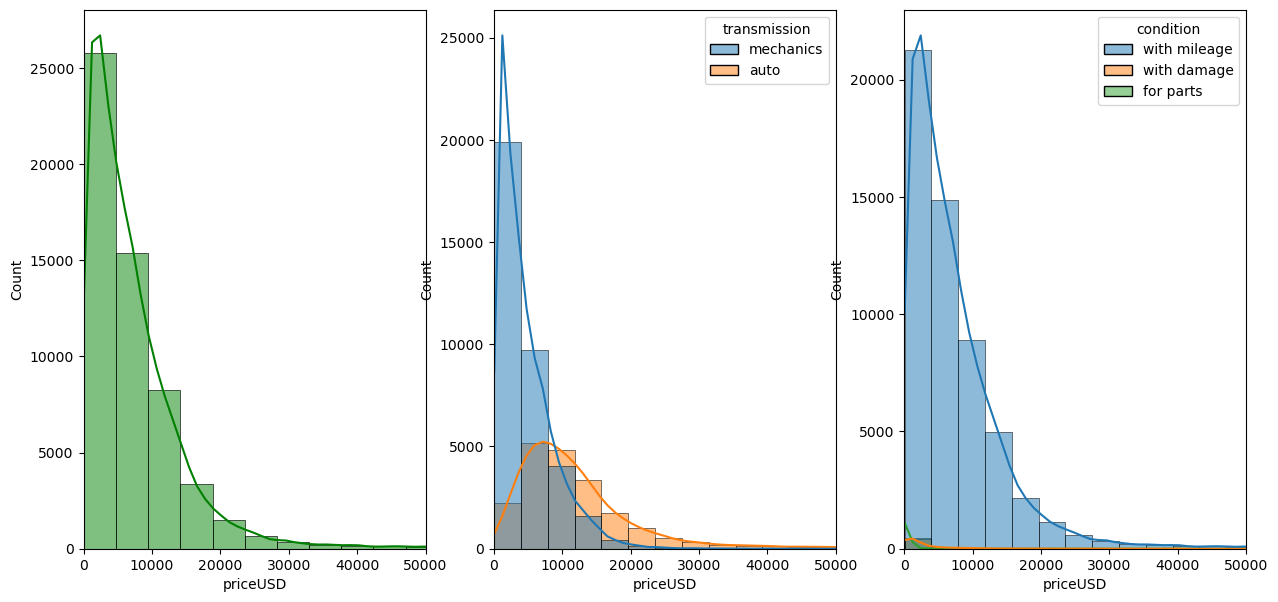

In [14]:
# Visualize average score distribution to make some conclusion

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(131)
sns.histplot(data=df, x='priceUSD', bins=50, kde=True, color='g')
plt.xlim(0,50000)
plt.subplot(132)
sns.histplot(data=df, x='priceUSD', bins=60, kde=True, hue='transmission')
plt.xlim(0,50000)
plt.subplot(133)
sns.histplot(data=df, x='priceUSD', bins=60, kde=True, hue='condition')
plt.xlim(0,50000)
plt.show()

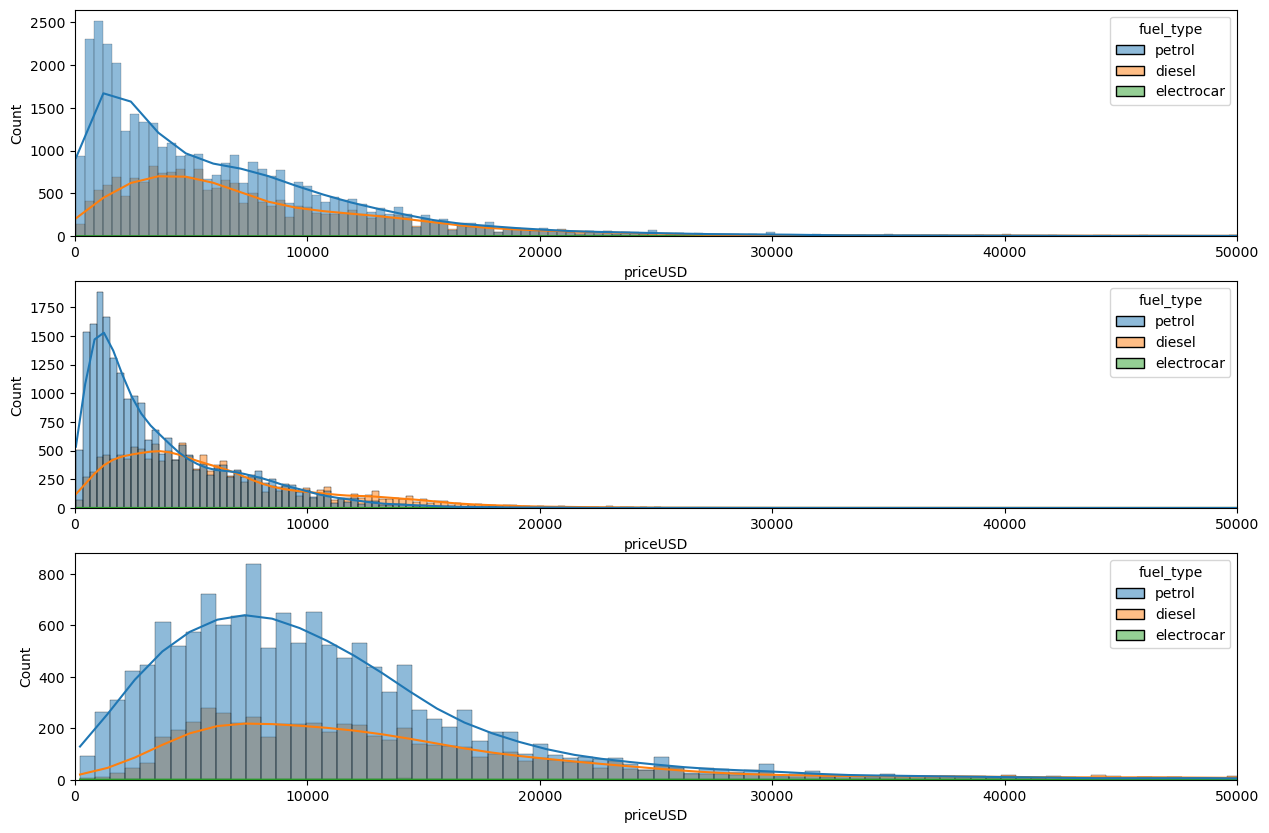

In [15]:
plt.subplots(1,3,figsize=(15,10))
plt.subplot(311)
sns.histplot(data=df,x='priceUSD',kde=True,hue='fuel_type')
plt.xlim(0,50000)

plt.subplot(312)
sns.histplot(data=df[df.transmission=='mechanics'],x='priceUSD', kde=True, hue='fuel_type')
plt.xlim(0,50000)

plt.subplot(313)
sns.histplot(data=df[df.transmission=='auto'],x='priceUSD', kde=True, hue='fuel_type')
plt.xlim(0,50000)

plt.show()

# <p style="padding:10px;background-color:#03fc88 ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Univariate Analysis with Visualisation</p>

### Univariate Analysis of Numerical Variables

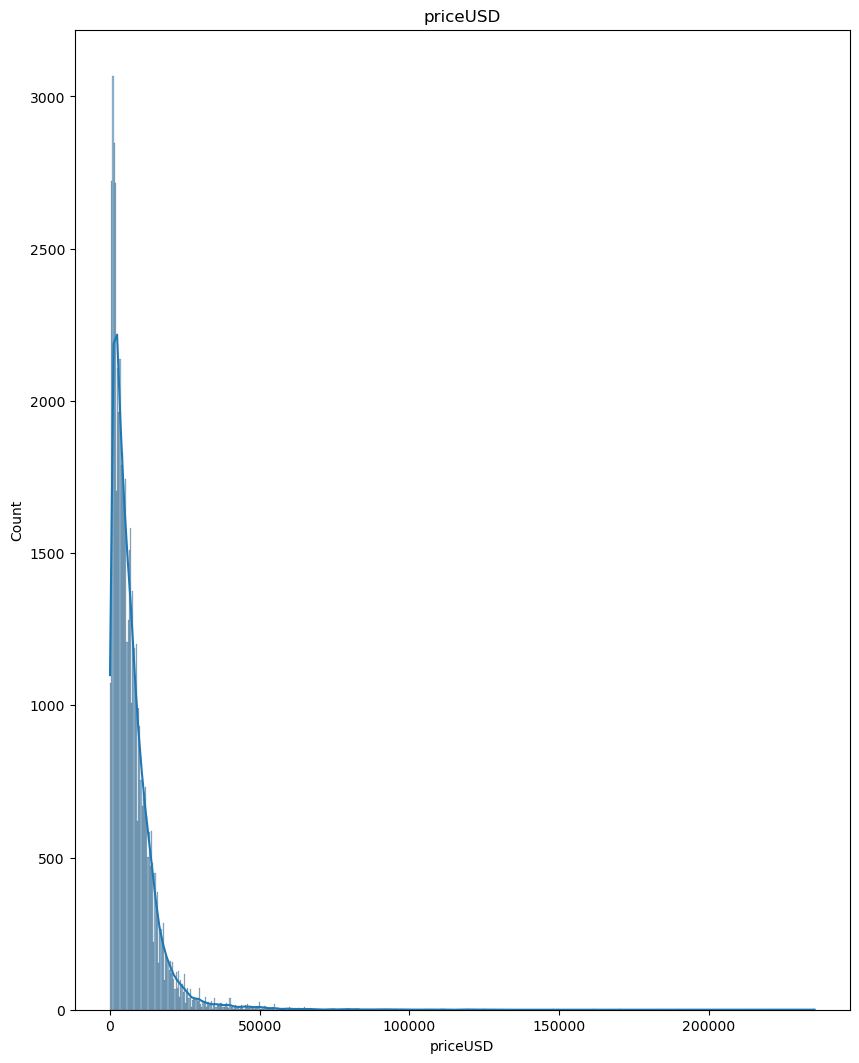

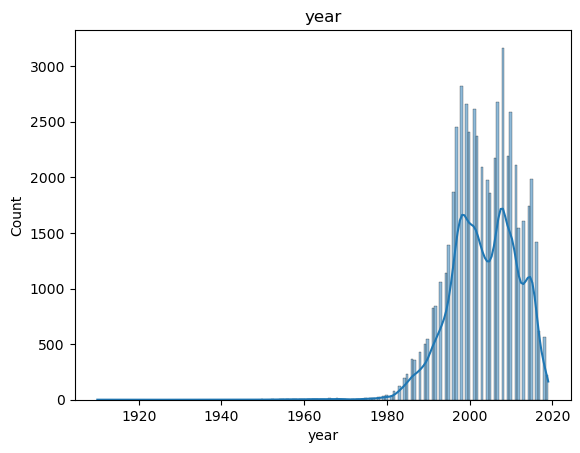

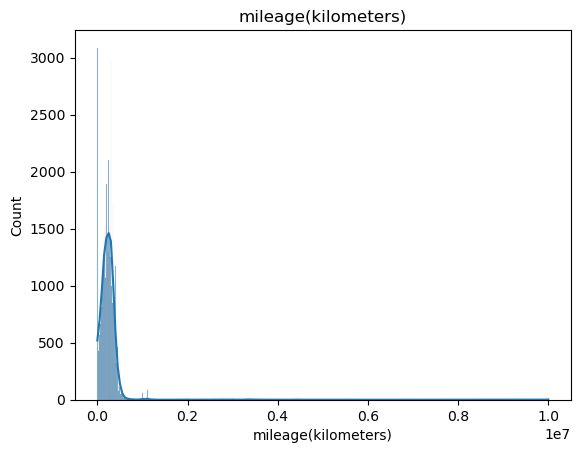

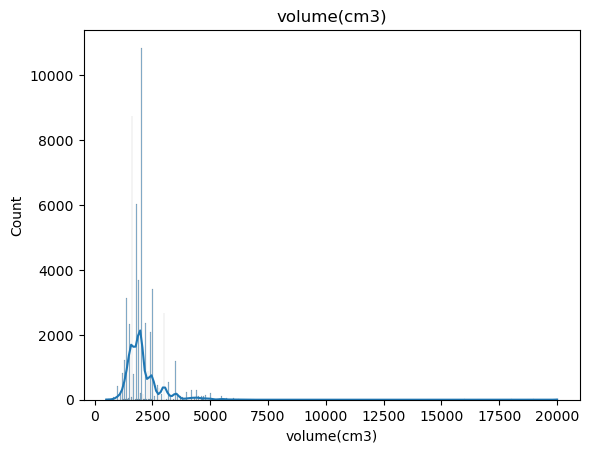

In [20]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
x = 1
for i in numerical_features:
    sb.histplot(data = df, x = i, kde=True)
    plt.title(i)
    print('\n')
    plt.show()

### Univariate analysis for categorical variables

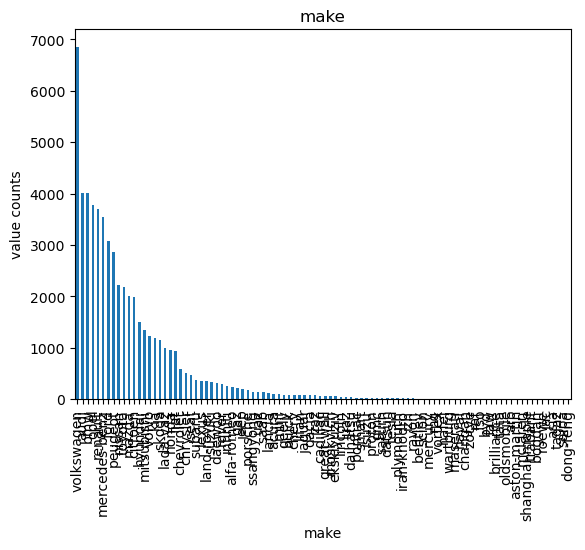

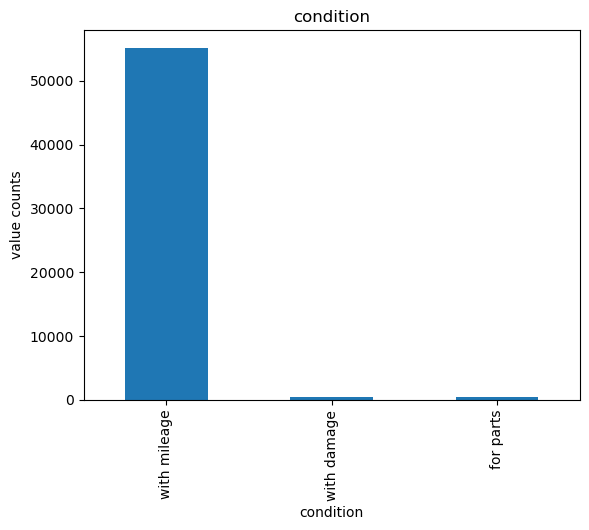

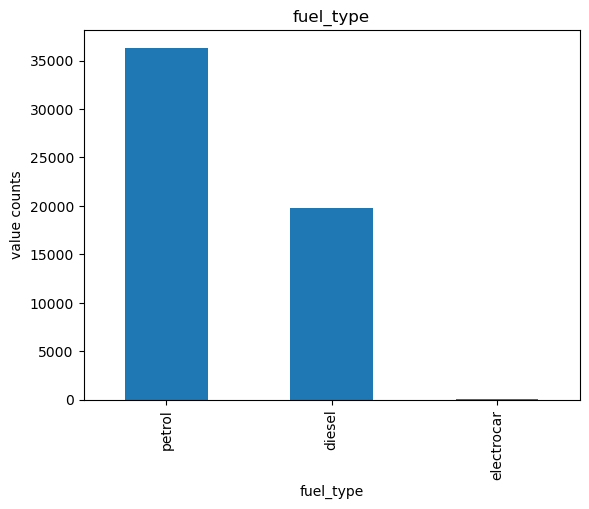

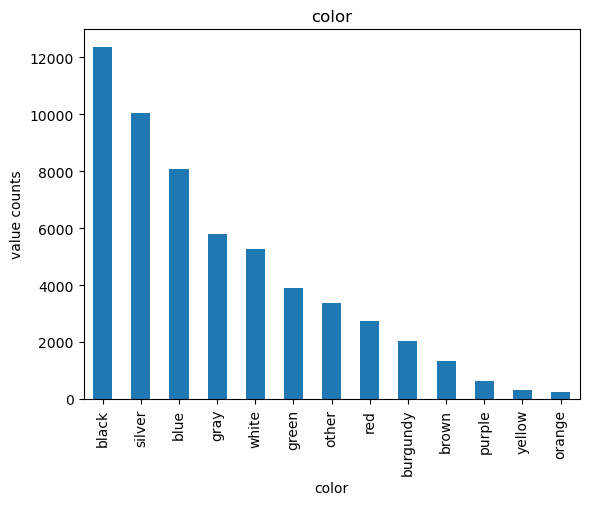

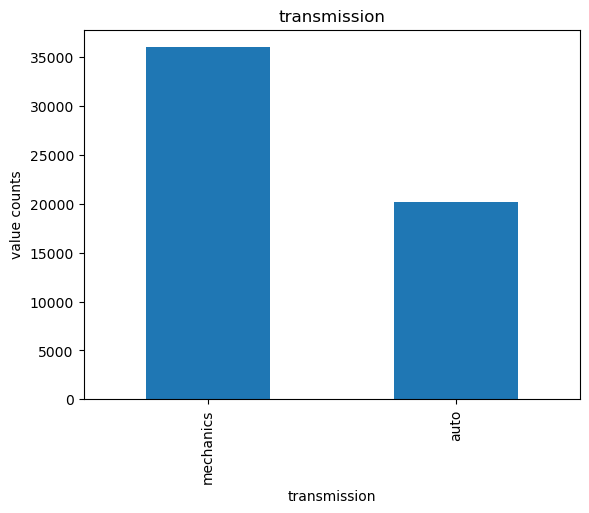

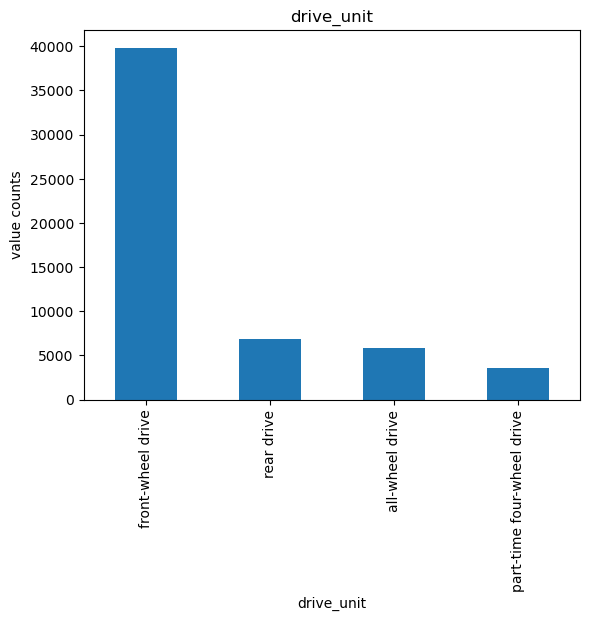

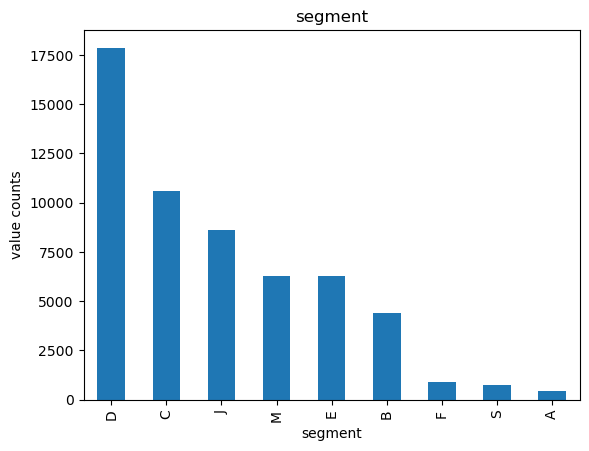

In [22]:
for i in categorical_features:
    df[i].value_counts().plot(kind='bar', xlabel = i , ylabel='value counts', title = i)
    print('\n')
    plt.show()

# <p style="padding:10px;background-color:#03fc88 ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Bivariate Analysis with Visualisation</p>

### Correlation heatmap

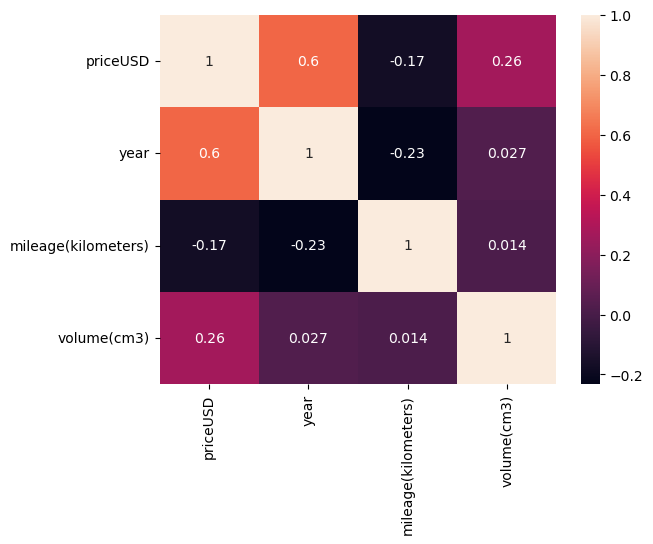

In [ ]:
sb.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

### Pairplot

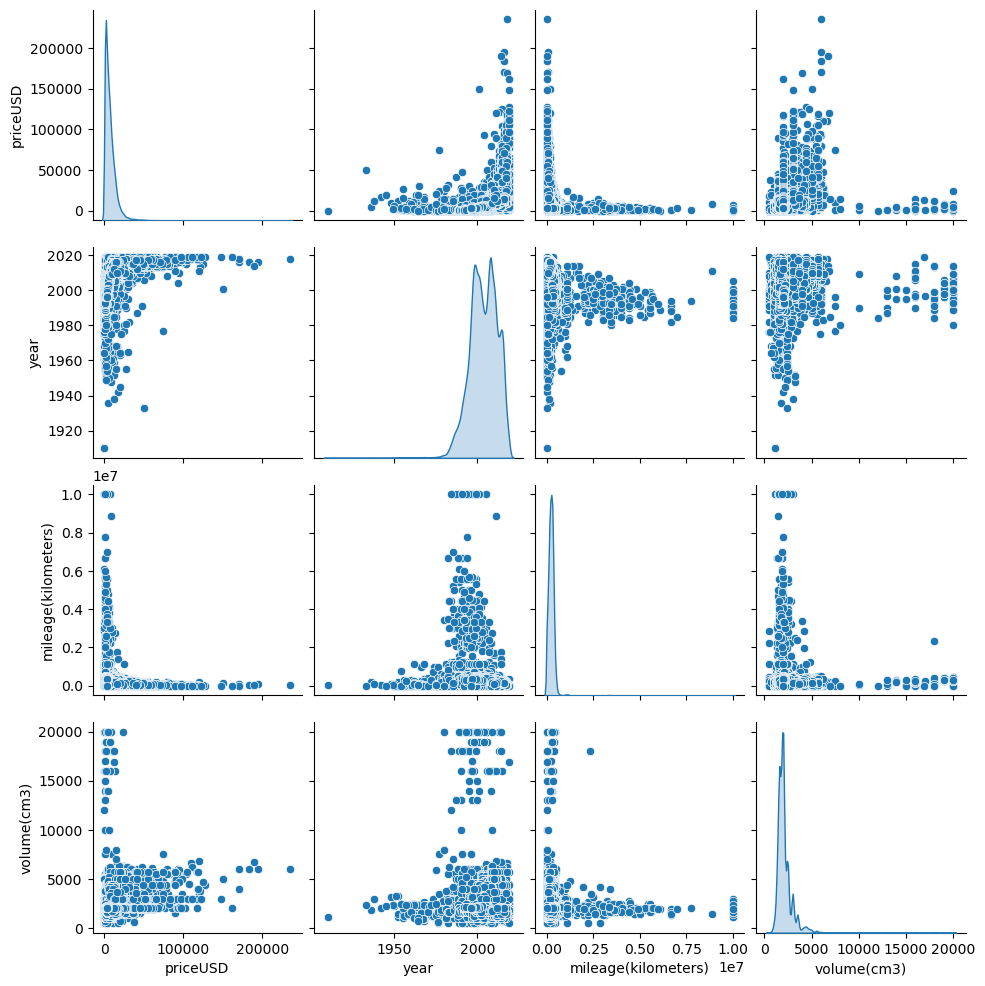

In [ ]:
sb.pairplot(df,diag_kind='kde')
plt.show()

## Categorical Features vs Target Feature Price Boxplot

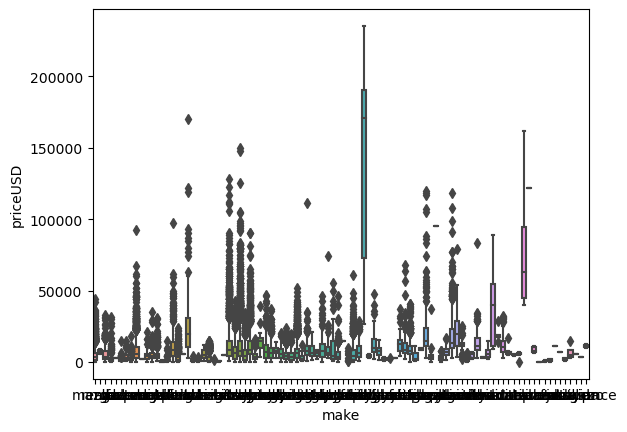

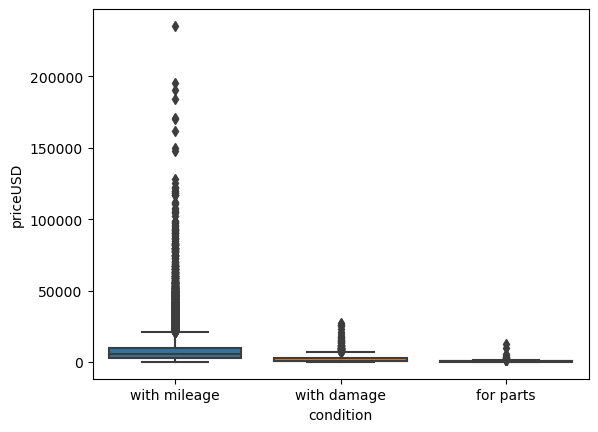

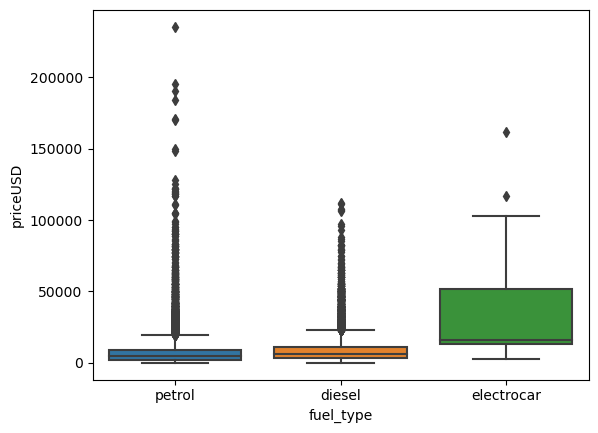

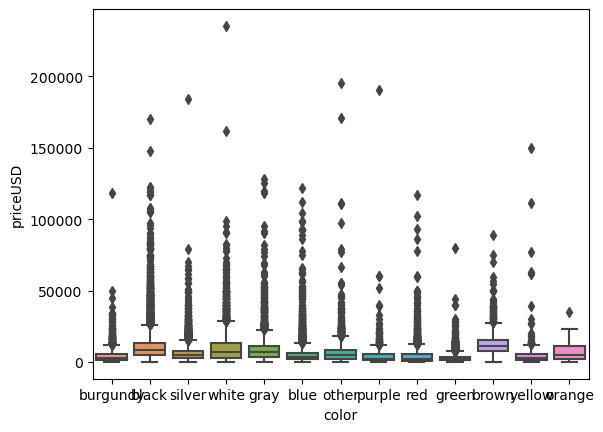

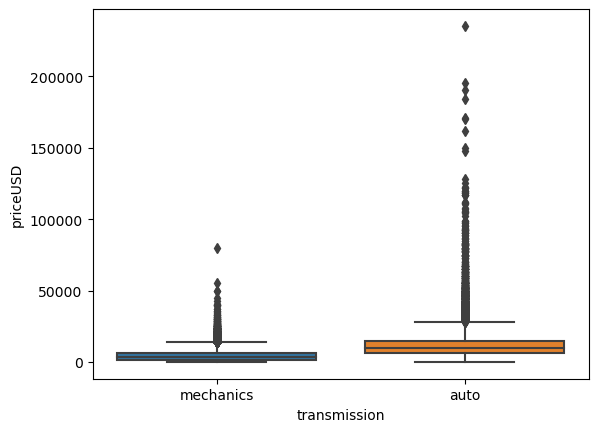

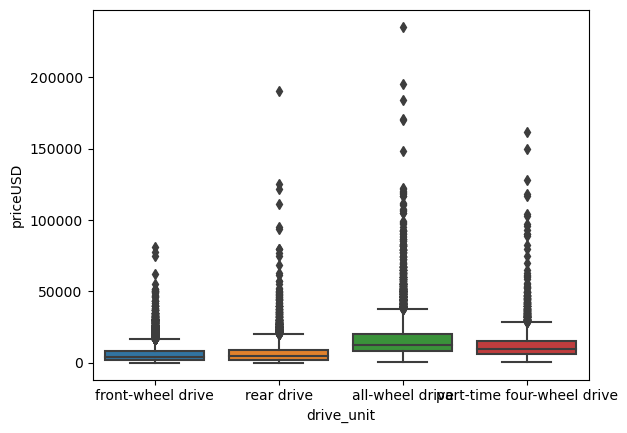

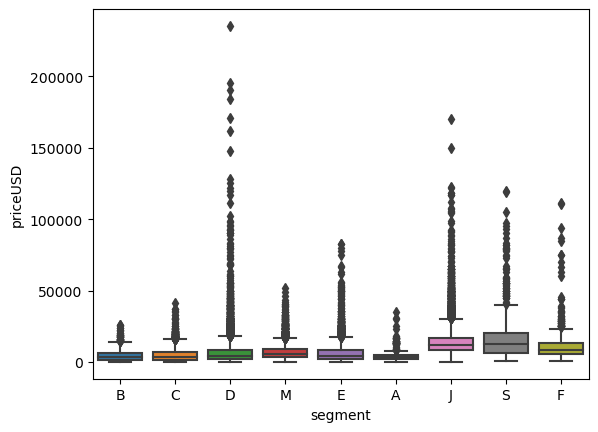

In [23]:
for i in categorical_features:
    sb.boxplot(data=df, x=i , y='priceUSD')
    plt.show()

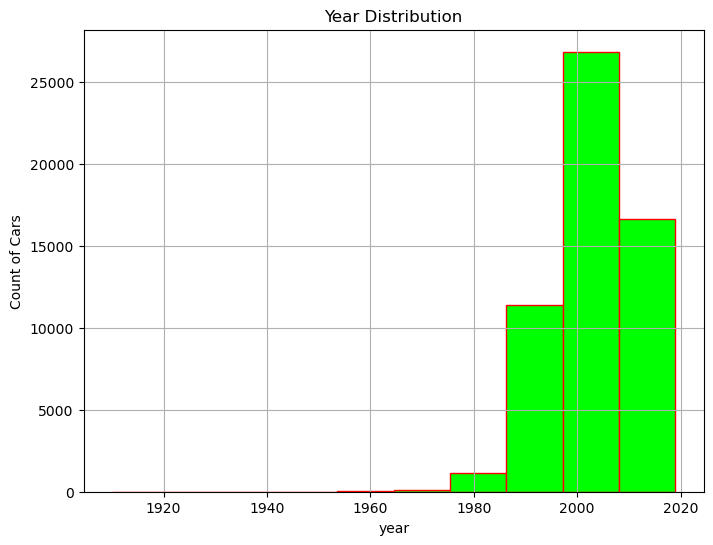

In [ ]:
# Distribution of Year

plt.figure(figsize=[8, 6])
df['year'].hist( color='lime', edgecolor='red')
plt.xlabel('year')
plt.ylabel('Count of Cars')
plt.title(label= 'Year Distribution')
plt.show()

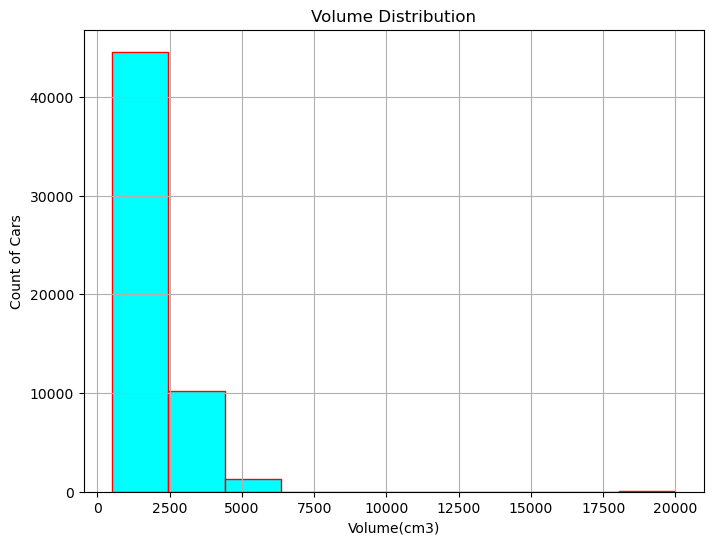

In [ ]:
# Distribution of volume

plt.figure(figsize=[8, 6])
df['volume(cm3)'].hist(  color='cyan', edgecolor='red')
plt.xlabel('Volume(cm3)')
plt.ylabel('Count of Cars')
plt.title(label= 'Volume Distribution')
plt.show()

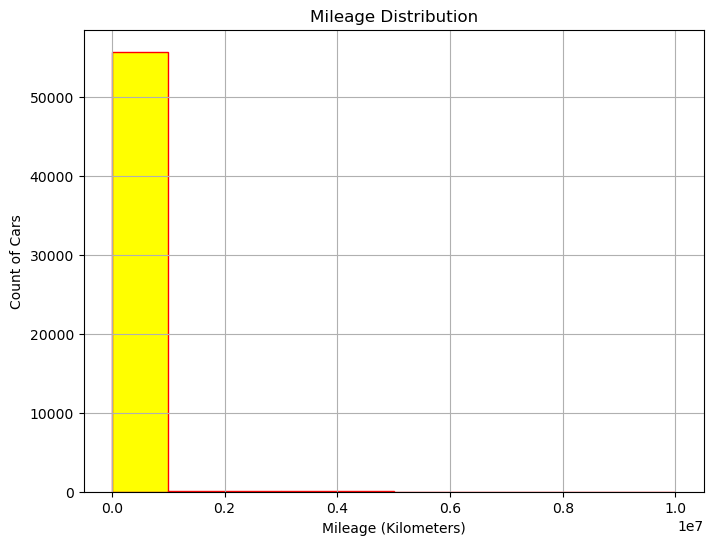

In [ ]:
# Distribution of Mileage

plt.figure(figsize=[8, 6])
df['mileage(kilometers)'].hist(color='yellow', edgecolor='red')
plt.xlabel('Mileage (Kilometers)')
plt.ylabel('Count of Cars')
plt.title(label= 'Mileage Distribution')
plt.show()

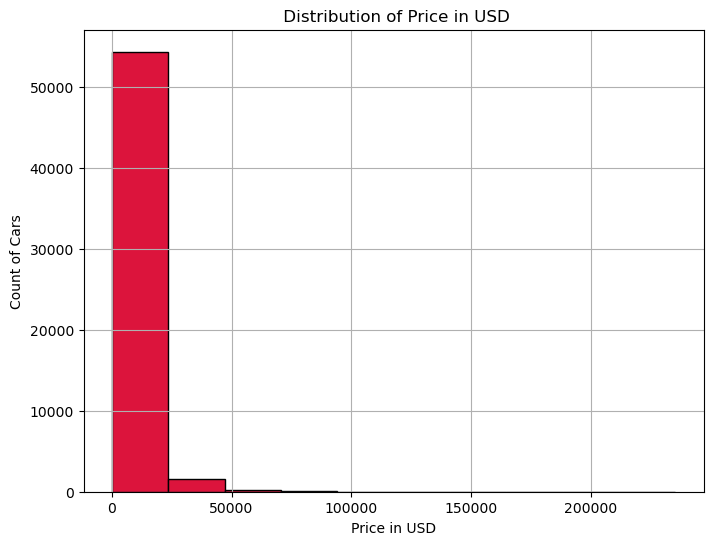

In [ ]:
# Distribution of Price

plt.figure(figsize=[8, 6])
df['priceUSD'].hist( color='crimson', edgecolor='black')
plt.xlabel('Price in USD')
plt.ylabel('Count of Cars')
plt.title(label= ' Distribution of Price in USD')
plt.show()